In [34]:
#!pip install nltk
!pip install textblob
!pip install tweepy
!pip install wordcloud


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 3.9 MB/s eta 0:00:0000:0100:01


In [3]:
from datasets import load_dataset
import pandas as pd

/home/isaure/.pyenv/versions/3.10.6/envs/fake-news/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [36]:
import numpy as np

import string
import nltk 

from nltk import word_tokenize
#from nltk.stem import WorldNetLemmatizer

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import string
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS


In [37]:

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /home/isaure/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/isaure/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/isaure/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/isaure/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [38]:
dataset = load_dataset("mediabiasgroup/mbib-base", "racial-bias")
df = pd.DataFrame(dataset['train'])
df.head()

Found cached dataset mbib-base (/home/isaure/.cache/huggingface/datasets/mediabiasgroup___mbib-base/racial-bias/1.0.0/cf6f80c612f1363f2162f92f58e1113915a6b01aa07680513a18b7d94570e875)
100%|██████████| 1/1 [00:00<00:00, 59.07it/s]


,text,label
0,nah fam any art of best girl is good art,0
1,flaming neko girl is best girl easy amp b fant...,0
2,similar motive where bush came out and said mu...,0
3,no fuck that religion as an excuse shit they a...,0
4,so you believe ex muslims are vile criminals,0


In [39]:
df.shape


(9788, 2)

In [40]:
data_text = df["text"]

In [45]:
word_count= data_text.apply(lambda x: len(x.split()))
word_count.describe()


count    9788.000000
mean       17.924704
std         7.100797
min         1.000000
25%        12.000000
50%        18.000000
75%        23.000000
max        41.000000
Name: text, dtype: float64

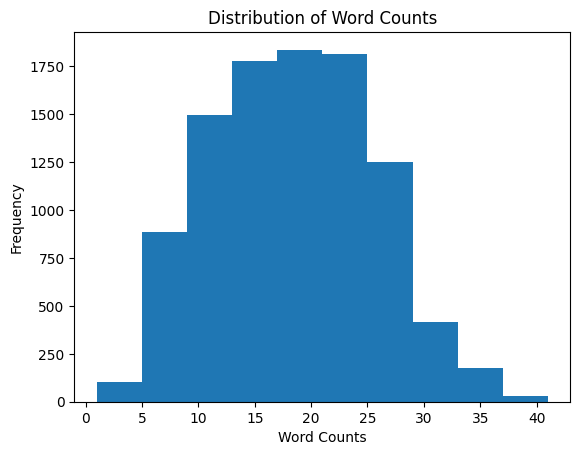

In [61]:
plt.hist(word_count, bins=10)
plt.xlabel('Word Counts')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts')
plt.show();

In [81]:
import pandas as pd

# Assuming your DataFrame is named 'df' and the label column is named 'label'
count_label_1 = df[df['label'] == 1].shape[0]
count_label_0 = df[df['label'] == 0].shape[0]

# Print the counts
print("Count of Label 1:", count_label_1)
print("Count of Label 0:", count_label_0)


Count of Label 1: 4894
Count of Label 0: 4894


In [82]:
round(df["label"].value_counts(normalize = True), 2)


label
0    0.5
1    0.5
Name: proportion, dtype: float64

In [80]:
if df[:1].value == 1:
    df["label"].value_counts()

AttributeError: 'DataFrame' object has no attribute 'value'

In [76]:
count_label_0 = df['label'].value_counts()[0]
count_label_0

4894

In [67]:
count_label_1 = df['label'].value_counts()[1]
count_label_1
count_label_0 = df['label'].value_counts()[0]


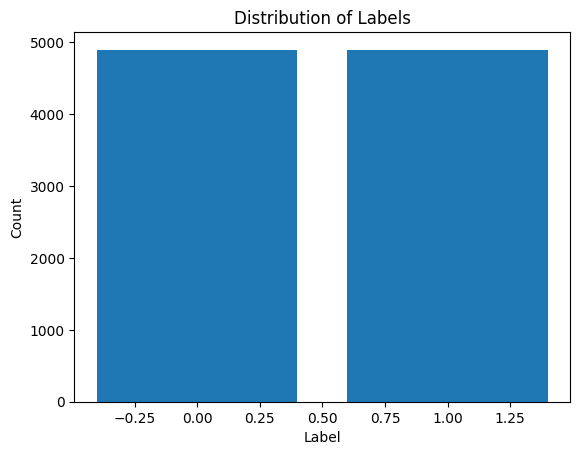

In [68]:
label_counts = df['label'].value_counts()

plt.bar(label_counts.index, label_counts.values)

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')

plt.show()

4894

4894

In [50]:
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

(-0.5, 399.5, 199.5, -0.5)

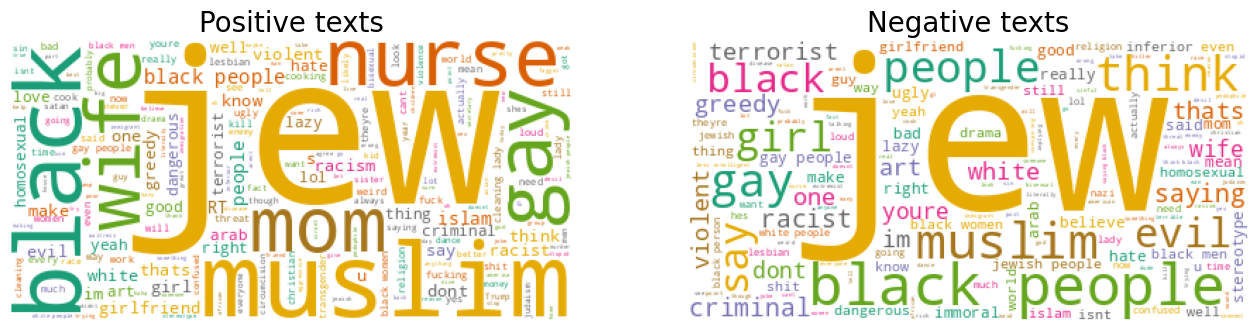

In [83]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
from textwrap import wrap

# Create a wordcloud for positive and negative texts
pos_text = ' '.join(df[df.label == 1].text)
neg_text = ' '.join(df[df.label == 0].text)
wc = WordCloud(stopwords=STOPWORDS, background_color='white', colormap='Dark2', max_font_size=150, random_state=42)
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(wc.generate(pos_text))
plt.title('Positive texts', fontsize=20)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(wc.generate(neg_text))
plt.title('Negative texts', fontsize=20)
plt.axis('off')

In [87]:
count_rows_with_word_jew = df[df['text'].str.contains('jew', case=False)].shape[0]
count_rows_with_word_jew/label_counts


label
0    0.357376
1    0.357376
Name: count, dtype: float64

In [60]:
sia = SentimentIntensityAnalyzer
sentiments = [sia.polarity_scores(df["text"]) for example in df]

TypeError: SentimentIntensityAnalyzer.polarity_scores() missing 1 required positional argument: 'text'

In [ ]:
# Perform sentiment analysis
sia = SentimentIntensityAnalyzer()
sentiments = [sia.polarity_scores(example['text']) for example in dataset]
sentiment_labels = ['positive' if sentiment['compound'] > 0 else 'negative' if sentiment['compound'] < 0 else 'neutral' for sentiment in sentiments]

# Preprocess the text data
corpus = [example['text'] for example in dataset]
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(corpus)

# Apply Latent Dirichlet Allocation (LDA) for topic modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Extract main common topics
feature_names = vectorizer.get_feature_names()
top_words = 10  # Number of top words to display for each topic
common_topics = []
for topic_idx, topic in enumerate(lda.components_):
    topic_words = [feature_names[i] for i in topic.argsort()[:-top_words - 1:-1]]
    common_topics.append(topic_words)

# Analyze sentiment within topics
topic_sentiments = {}
for i, topic_words in enumerate(common_topics):
    topic_sentiments[i] = {'positive': 0, 'negative': 0, 'neutral': 0}
    for j, sentiment_label in enumerate(sentiment_labels):
        if sentiment_label != 'neutral':
            for word in topic_words:
                if word in corpus[j]:
                    topic_sentiments[i][sentiment_label] += 1

# Print the common topics and their associated sentiment distribution
for i, topic_words in enumerate(common_topics):
    print(f"Topic {i}: {', '.join(topic_words)}")
    print(f"Sentiment distribution: {topic_sentiments[i]}")
    print()
